In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("logatta.csv")
df.head()

,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender,accepted for the interview
0,41,Travel_Rarely,2,Single,Yes,1,1102,Female,True
1,49,Travel_Frequently,1,Married,No,2,279,Male,False
2,37,Travel_Rarely,2,Single,Yes,4,1373,Male,False
3,33,Travel_Frequently,4,Married,Yes,5,1392,Female,False
4,27,Travel_Rarely,1,Married,No,7,591,Male,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1492 non-null   int64 
 1   BusinessTravel              1492 non-null   object
 2   Education                   1492 non-null   int64 
 3   MaritalStatus               1492 non-null   object
 4   OverTime                    1492 non-null   object
 5   EmployeeNumber              1492 non-null   int64 
 6   DailyRate                   1492 non-null   int64 
 7   Gender                      1492 non-null   object
 8   accepted for the interview  1492 non-null   bool  
dtypes: bool(1), int64(4), object(4)
memory usage: 94.8+ KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [6]:
X = df.drop("accepted for the interview", axis=1)
y = df['accepted for the interview']

In [7]:
X

,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender
0,41,Travel_Rarely,2,Single,Yes,1,1102,Female
1,49,Travel_Frequently,1,Married,No,2,279,Male
2,37,Travel_Rarely,2,Single,Yes,4,1373,Male
3,33,Travel_Frequently,4,Married,Yes,5,1392,Female
4,27,Travel_Rarely,1,Married,No,7,591,Male
...,...,...,...,...,...,...,...,...
1487,35,Travel_Rarely,3,Married,Yes,1856,682,Male
1488,35,Travel_Rarely,4,Divorced,No,1857,1103,Male
1489,31,Travel_Rarely,3,Single,Yes,1858,976,Male
1490,37,Travel_Rarely,4,Single,No,1859,1351,Female


In [8]:
y

0        True
1       False
2       False
3       False
4       False
        ...  
1487    False
1488    False
1489    False
1490    False
1491    False
Name: accepted for the interview, Length: 1492, dtype: bool

In [9]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns
X[cat_cols]

,BusinessTravel,MaritalStatus,OverTime,Gender
0,Travel_Rarely,Single,Yes,Female
1,Travel_Frequently,Married,No,Male
2,Travel_Rarely,Single,Yes,Male
3,Travel_Frequently,Married,Yes,Female
4,Travel_Rarely,Married,No,Male
...,...,...,...,...
1487,Travel_Rarely,Married,Yes,Male
1488,Travel_Rarely,Divorced,No,Male
1489,Travel_Rarely,Single,Yes,Male
1490,Travel_Rarely,Single,No,Female


In [10]:
encoder = OrdinalEncoder()
X[cat_cols] = encoder.fit_transform(X[cat_cols])
X[cat_cols]

,BusinessTravel,MaritalStatus,OverTime,Gender
0,2.0,2.0,1.0,0.0
1,1.0,1.0,0.0,1.0
2,2.0,2.0,1.0,1.0
3,1.0,1.0,1.0,0.0
4,2.0,1.0,0.0,1.0
...,...,...,...,...
1487,2.0,1.0,1.0,1.0
1488,2.0,0.0,0.0,1.0
1489,2.0,2.0,1.0,1.0
1490,2.0,2.0,0.0,0.0


In [11]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X[num_cols]

,Age,Education,EmployeeNumber,DailyRate
0,0.452168,-0.897027,-1.710930,0.735781
1,1.331314,-1.876080,-1.709278,-1.303018
2,0.012595,-0.897027,-1.705975,1.407124
3,-0.426978,1.061078,-1.704323,1.454192
4,-1.086338,-1.876080,-1.701020,-0.530108
...,...,...,...,...
1487,-0.207192,0.082025,1.352668,-0.304675
1488,-0.207192,1.061078,1.354320,0.738259
1489,-0.646765,0.082025,1.355971,0.423644
1490,0.012595,1.061078,1.357623,1.352624


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [14]:
log_reg = LogisticRegression(max_iter=1000)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
log_reg.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [16]:
print("Logistic Regression Accuracy: ", log_reg.score(X_test, y_test))
print("Naive Bayes Accuracy: ", nb.score(X_test, y_test))
print("KNN Accuracy: ", knn.score(X_test, y_test))

Logistic Regression Accuracy:  0.9130434782608695
Naive Bayes Accuracy:  0.8695652173913043
KNN Accuracy:  0.9498327759197325


In [17]:
y_pred_lr = log_reg.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
print("Logistic Regression Accuracy: ")
print(classification_report(y_test, y_pred_lr))

print("Naive Bayes Report")
print(classification_report(y_test, y_pred_nb))

print("KNN Report")
print(classification_report(y_test, y_pred_knn))

Logistic Regression Accuracy: 
              precision    recall  f1-score   support

       False       0.93      0.98      0.95       268
        True       0.65      0.35      0.46        31

    accuracy                           0.91       299
   macro avg       0.79      0.67      0.71       299
weighted avg       0.90      0.91      0.90       299

Naive Bayes Report
              precision    recall  f1-score   support

       False       1.00      0.86      0.92       268
        True       0.44      0.97      0.61        31

    accuracy                           0.87       299
   macro avg       0.72      0.91      0.76       299
weighted avg       0.94      0.87      0.89       299

KNN Report
              precision    recall  f1-score   support

       False       0.95      1.00      0.97       268
        True       0.94      0.55      0.69        31

    accuracy                           0.95       299
   macro avg       0.95      0.77      0.83       299
weighted avg 

In [20]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_knn = confusion_matrix(y_test, y_pred_knn)

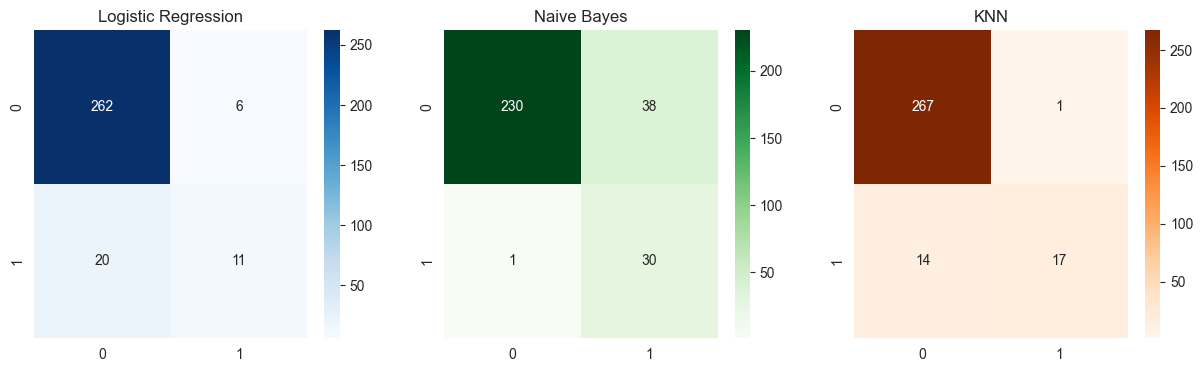

In [21]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression")

plt.subplot(1,3,2)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Greens")
plt.title("Naive Bayes")

plt.subplot(1,3,3)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Oranges")
plt.title("KNN")

plt.show()


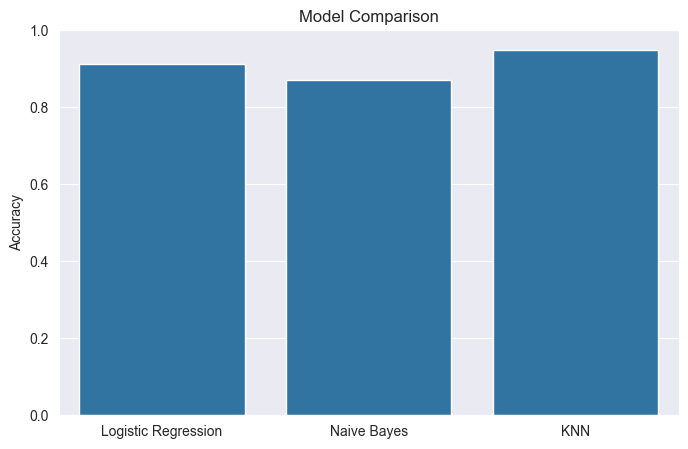

In [22]:
models = ["Logistic Regression", "Naive Bayes", "KNN"]
accuracies = [
    log_reg.score(X_test, y_test),
    nb.score(X_test, y_test),
    knn.score(X_test, y_test)
]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()
